Viewing A Two Dimensional FFT2 in Python

In [1]:
import numpy
import scipy
import imageio
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib inline

from Fourier2 import Fourier2 as pappy

In [2]:
im = imageio.imread("~/Pictures/GSzfringe.png")
q = pappy("~/Pictures/GSzfringe.png")

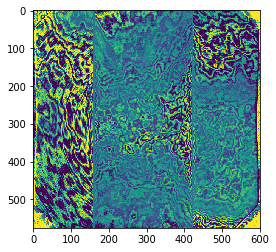

In [3]:
# plot an image
plt.imshow(im)


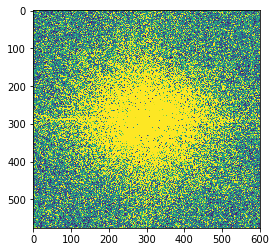

In [4]:
q.view()

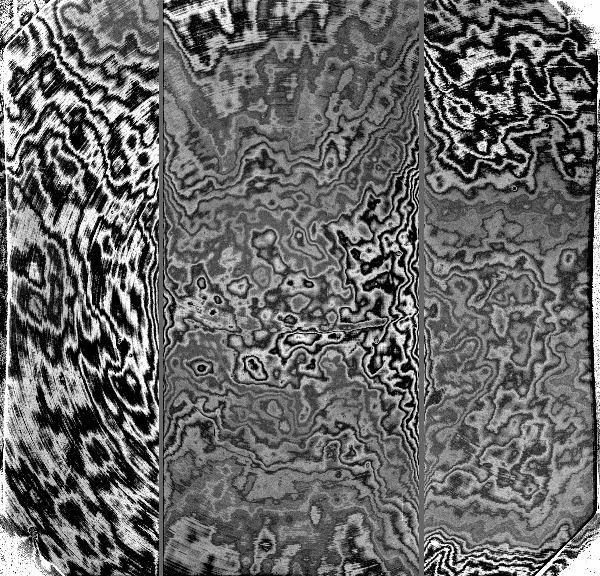

In [5]:
# Show an image inline within a Jupyter notebook
Image("/home/brandon/Pictures/GSzfringe.png")

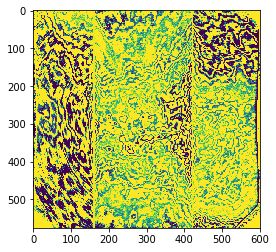

In [6]:
q.viewinverse()

We can now attempt to build a model of the original image. A model will omit certain pieces of information deemed unnecessary to represent the object. In this case, our model will omit frequencies and phases which are "not strong" in comparison to others, i.e. they fall below a threshold value.

In [8]:


# threshold values 
fpc = numpy.clip(q.img, q.img.max()*.999, q.img.max())
ppc = numpy.clip(q.img, 200.0, q.img.max())

q.viewphase()
q.viewfrequency()


AttributeError: 'Fourier2' object has no attribute 'img'

Now we need to combine the frequency and phase information before taking the Inverse FFT2.

In [ ]:
# combine 
A = fpc[:,:] + 1j * ppc[:,:]


In [ ]:
viewfft2(A)

We can view the model in the spatial domain

In [ ]:
spatial = numpy.fft.ifft2(A)

In [ ]:
plt.imshow(abs(spatial), vmin=0.0, vmax=0.2)

"spatial" is a model of the original image. Hopefully, it doesn't contain as much information as the original. As for finding structure, the frequency information looks like a spherical blob with some information in the higher frequencies necessary to synthesize the model.

In [ ]:
#save the image
plt.imsave("spatial.png", abs(spatial), vmin=0.0, vmax=0.2)